# Laboratorio: Feature Engineering con el dataset Wine Quality

En este notebook entrenarás un modelo de clasificación para predecir si un vino es de
**buena calidad** o no, utilizando el dataset público *Wine Quality* de UCI.

1. Primero ejecutaremos un modelo **sin Feature Engineering** (solo con las variables originales).
2. Después, en la sección marcada como:

```python
# ============================================
# SECCIÓN PARA FEATURE ENGINEERING (A COMPLETAR)
# ============================================
```

deberás **crear nuevas características y/o aplicar transformaciones** (por ejemplo,
transformaciones logarítmicas, relaciones entre variables, escalado, etc.) y volver
a entrenar el modelo para analizar la mejora en el desempeño.

Alumno: Victor Manuel Telles Amezcua | 737066

In [11]:
# ============================
# 1. IMPORTACIÓN DE LIBRERÍAS
# ============================

import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

import matplotlib.pyplot as plt

In [12]:
# ==================
# 2. CARGA DE DATOS
# ==================

# IMPORTANTE:
# Descarga el archivo winequality-red.csv o winequality-white.csv desde UCI
# y colócalo en la misma carpeta que este notebook.
# En UCI el separador es ';', por eso usamos sep=';'.

# seleccionar el archivo CSV
csv_option = 1  # Cambia a 2 para usar el otro archivo (white)

if csv_option == 1:
    csv_path = "data/winequality-red.csv"
else:
    csv_path = "data/winequality-white.csv"

data = pd.read_csv(csv_path, sep=';')

print("Primeras filas del dataset:")
display(data.head())

print("\nInformación general del dataset:")
print(data.info())

print("\nEstadísticas descriptivas:")
display(data.describe())

Primeras filas del dataset:


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5



Información general del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB
None

Estadísticas descriptivas:


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [13]:
# ======================================================
# 3. CREACIÓN DE LA VARIABLE OBJETIVO BINARIA (LABEL)
# ======================================================

# La columna 'quality' toma valores enteros (por ejemplo, de 3 a 8).
# Definimos "buen vino" si quality >= 6, y "no tan bueno" si quality <= 5.

data['good_quality'] = (data['quality'] >= 6).astype(int)

# Variable objetivo
y = data['good_quality']

# Variables de entrada: todas las columnas excepto 'quality' y 'good_quality'
X = data.drop(columns=['quality', 'good_quality'])

print("Columnas de entrada (features):")
print(X.columns)

print("\nDistribución de la variable objetivo (0 = calidad baja, 1 = calidad alta):")
print(y.value_counts())

Columnas de entrada (features):
Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol'],
      dtype='object')

Distribución de la variable objetivo (0 = calidad baja, 1 = calidad alta):
good_quality
1    855
0    744
Name: count, dtype: int64


In [14]:
# ===========================================
# 4. DIVISIÓN EN CONJUNTOS DE ENTRENAMIENTO
#    Y PRUEBA (SIN FEATURE ENGINEERING)
# ===========================================

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

print("Tamaño del conjunto de entrenamiento:", X_train.shape)
print("Tamaño del conjunto de prueba:", X_test.shape)

Tamaño del conjunto de entrenamiento: (1119, 11)
Tamaño del conjunto de prueba: (480, 11)


In [15]:
# =======================================
# 5. MODELO BASE k-NN SIN TRANSFORMACIÓN
# =======================================

# Usamos k-NN con k=5 como modelo sencillo de referencia.
# NOTA: aquí no aplicamos ningún tipo de feature engineering
# (no hay escalado, ni nuevas columnas, ni transformaciones).
# Esto es intencional: servirá como línea base para comparar
# después de aplicar feature engineering.

knn_base = KNeighborsClassifier(n_neighbors=5)

# Entrenamiento del modelo con los datos originales
knn_base.fit(X_train, y_train)

# Predicciones en el conjunto de prueba
y_pred_base = knn_base.predict(X_test)

# Cálculo de métricas
accuracy_base = accuracy_score(y_test, y_pred_base)

print(f"Accuracy del modelo BASE (sin Feature Engineering): {accuracy_base:.4f}\n")
print("Reporte de clasificación (modelo base):")
print(classification_report(y_test, y_pred_base))

Accuracy del modelo BASE (sin Feature Engineering): 0.6396

Reporte de clasificación (modelo base):
              precision    recall  f1-score   support

           0       0.60      0.66      0.63       223
           1       0.68      0.62      0.65       257

    accuracy                           0.64       480
   macro avg       0.64      0.64      0.64       480
weighted avg       0.64      0.64      0.64       480



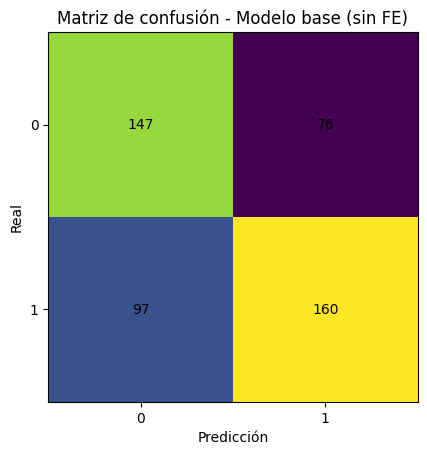

In [16]:
# ====================================
# 6. MATRIZ DE CONFUSIÓN (MODELO BASE)
# ====================================

cm_base = confusion_matrix(y_test, y_pred_base)

fig, ax = plt.subplots()
im = ax.imshow(cm_base)

ax.set_title("Matriz de confusión - Modelo base (sin FE)")
ax.set_xlabel("Predicción")
ax.set_ylabel("Real")

# Etiquetas de los ejes
ax.set_xticks([0, 1])
ax.set_yticks([0, 1])
ax.set_xticklabels(['0', '1'])
ax.set_yticklabels(['0', '1'])

# Mostrar los números en cada celda
for i in range(cm_base.shape[0]):
    for j in range(cm_base.shape[1]):
        ax.text(j, i, cm_base[i, j],
                ha='center', va='center', color='black')

plt.show()

In [17]:
# =============================================================================
# 7. SECCIÓN PARA FEATURE ENGINEERING (A COMPLETAR POR EL/LA ESTUDIANTE)
# =============================================================================
# En esta sección deberás:
#   - Crear nuevas características a partir de X_train y X_test.
#     Ejemplos:
#        * Transformaciones logarítmicas sobre variables muy sesgadas.
#        * Relaciones entre variables (ratios, productos, diferencias, etc.).
#   - Opcional pero MUY recomendado: aplicar escalado (por ejemplo MinMaxScaler
#     o StandardScaler), recordando:
#        * Ajustar el escalador SOLO con X_train.
#        * Aplicar la transformación al conjunto de prueba X_test.
#
# IMPORTANTE:
#   - NO modifiques X_train y X_test originales.
#   - Trabaja sobre copias: X_train_fe y X_test_fe.
#   - Al final de tus transformaciones, las variables que usará el modelo deben
#     llamarse:
#          X_train_model
#          X_test_model
#
#   De momento, dejamos esta sección de manera que, si no cambias nada,
#   el modelo usará exactamente las mismas características originales.
# =============================================================================

from sklearn.preprocessing import MinMaxScaler
# 7.1 Copiamos los conjuntos originales (NO MODIFICAR ESTAS LÍNEAS)
X_train_fe = X_train.copy()
X_test_fe = X_test.copy()

# 7.2 FEATURE ENGINEERING
## a) Nueva columna: razón de sulfuros
X_train_fe['sulfur_ratio'] = X_train_fe['free sulfur dioxide'] / (X_train_fe['total sulfur dioxide'] + 1e-6)
X_test_fe['sulfur_ratio'] = X_test_fe['free sulfur dioxide'] / (X_test_fe['total sulfur dioxide'] + 1e-6)
## b) Transformación logarítmica de azúcar residual
X_train_fe['log_residual_sugar'] = np.log1p(X_train_fe['residual sugar'])
X_test_fe['log_residual_sugar'] = np.log1p(X_test_fe['residual sugar'])
## c) Escalado Min-Max
scaler = MinMaxScaler()
X_train_fe = pd.DataFrame(scaler.fit_transform(X_train_fe), columns=X_train_fe.columns, index=X_train_fe.index)
X_test_fe = pd.DataFrame(scaler.transform(X_test_fe), columns=X_test_fe.columns, index=X_test_fe.index)

# 7.3 Variables finales para el modelo
X_train_model = X_train_fe
X_test_model = X_test_fe

print("Dimensiones de X_train_model y X_test_model después de Feature Engineering:")
print(X_train_model.shape, X_test_model.shape)

Dimensiones de X_train_model y X_test_model después de Feature Engineering:
(1119, 13) (480, 13)


In [18]:
# =====================================================
# 8. MODELO k-NN DESPUÉS DE FEATURE ENGINEERING
# =====================================================

# Importante: aquí se usa X_train_model y X_test_model,
# que pueden contener nuevas características y/o datos escalados.

knn_fe = KNeighborsClassifier(n_neighbors=5)

knn_fe.fit(X_train_model, y_train)
y_pred_fe = knn_fe.predict(X_test_model)

accuracy_fe = accuracy_score(y_test, y_pred_fe)

print(f"Accuracy del modelo con Feature Engineering: {accuracy_fe:.4f}\n")
print("Reporte de clasificación (con Feature Engineering):")
print(classification_report(y_test, y_pred_fe))

Accuracy del modelo con Feature Engineering: 0.7292

Reporte de clasificación (con Feature Engineering):
              precision    recall  f1-score   support

           0       0.71      0.71      0.71       223
           1       0.75      0.75      0.75       257

    accuracy                           0.73       480
   macro avg       0.73      0.73      0.73       480
weighted avg       0.73      0.73      0.73       480



In [19]:
# =========================================
# 9. COMPARACIÓN Y PREGUNTAS DE REFLEXIÓN
# =========================================

print(f"Accuracy modelo BASE (sin FE):   {accuracy_base:.4f}")
print(f"Accuracy modelo con FE:          {accuracy_fe:.4f}")

mejora = accuracy_fe - accuracy_base
print(f"\nMejora absoluta en accuracy: {mejora:.4f}")

print("""
Reflexiona y responde (puedes hacerlo en una celda de Markdown aparte):

1. ¿Qué transformaciones de Feature Engineering aplicaste?
> Aplique una transformacion logaritmica a la variable de azucar residual, cree una nueva variable que es la razon entre el dioxido de azufre libre y total y escale todas las variables con MinMaxScaler.
2. ¿Qué variables nuevas creaste y por qué?
> 'sulfur_ratio': Para mostrar mejor la relacion entre los tipos de dioxido de azufre y 'log_residual_sugar' para reducir le sesgo de los valores altos que genere de azucar
3. ¿Cómo cambiaron las métricas (accuracy, precision, recall, F1)?
> Mejoraron un poco despues de aplicar Feature Enginering especialmente en el apartado de accurancy
4. ¿Por qué crees que esas transformaciones ayudaron (o no ayudaron) al modelo?
> Creo que si ayudaron porque las nuevas variables y el escalado permiten que el modelo distinga mejor los patrones y no se vea afectado por valores extremos.
""")

Accuracy modelo BASE (sin FE):   0.6396
Accuracy modelo con FE:          0.7292

Mejora absoluta en accuracy: 0.0896

Reflexiona y responde (puedes hacerlo en una celda de Markdown aparte):

1. ¿Qué transformaciones de Feature Engineering aplicaste?
> Aplique una transformacion logaritmica a la variable de azucar residual, cree una nueva variable que es la razon entre el dioxido de azufre libre y total y escale todas las variables con MinMaxScaler.
2. ¿Qué variables nuevas creaste y por qué?
> 'sulfur_ratio': Para mostrar mejor la relacion entre los tipos de dioxido de azufre y 'log_residual_sugar' para reducir le sesgo de los valores altos que genere de azucar
3. ¿Cómo cambiaron las métricas (accuracy, precision, recall, F1)?
> Mejoraron un poco despues de aplicar Feature Enginering especialmente en el apartado de accurancy
4. ¿Por qué crees que esas transformaciones ayudaron (o no ayudaron) al modelo?
> Creo que si ayudaron porque las nuevas variables y el escalado permiten que el mo